In [2]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [1]:
import random

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import numpy as np
import re 
import time

from wordcloud import WordCloud, ImageColorGenerator

%matplotlib inline

In [3]:
from tqdm.auto import tqdm
tqdm.pandas()

In [5]:
df = pd.read_csv("Suicide_Detection.csv", index_col = 'Unnamed: 0')
df.head()

,text,class
2,Ex Wife Threatening SuicideRecently I left my ...,suicide
3,Am I weird I don't get affected by compliments...,non-suicide
4,Finally 2020 is almost over... So I can never ...,non-suicide
8,i need helpjust help me im crying so hard,suicide
9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


<AxesSubplot:xlabel='class', ylabel='count'>

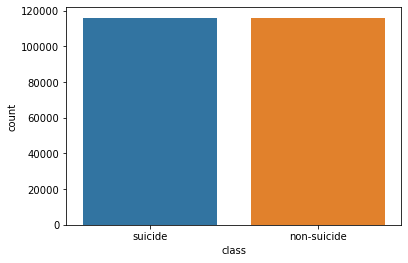

In [6]:
sns.countplot(data=df, x='class')

In [7]:
nlp = spacy.load('en_core_web_sm', disable = ['parser', 'ner'])

In [8]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x17a8ec76820>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x17a8ee291c0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x17a8eea57c0>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x17a8eea5640>)]

In [9]:
def clean_text(text):
    text = text.lower()
    # remove @username, #hashtag, url
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", text).split())
    doc = nlp(text)

    # lemmatization, remove stop words and other unrelevant character
    text = ' '.join(token.lemma_ for token in doc if
                not token.is_punct
                and not token.is_currency
                and not token.is_digit
                and not token.is_space
                and not token.is_stop
                and not token.like_num
                and not token.pos_ == "PROPN"
                    )
    return text

In [10]:
df['text'] = df['text'].progress_apply(clean_text)

  0%|          | 0/232074 [00:00<?, ?it/s]

In [11]:
def count_token(text):
    try:
        return len(nlp(text))
    except:
        return 0

In [12]:
df['token_number'] = df['text'].progress_apply(count_token)

  0%|          | 0/232074 [00:00<?, ?it/s]

In [14]:
print(f'Number of rows: {df.shape[0]}')
print(f'df columns: {df.columns.values}')

Number of rows: 232074
df columns: ['text' 'class' 'token_number']


<AxesSubplot:xlabel='token_number', ylabel='Count'>

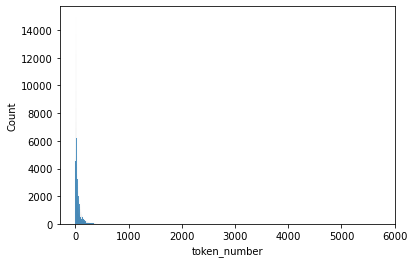

In [15]:
sns.histplot(df['token_number'])

In [16]:
# Check and count samples with 0 < Token <= 100

df_L100 = df[(df['token_number'] <= 100)  & (df['token_number']>0)]
print(f'df rows: {len(df_L100)}')
print(f'percentage of new df: {len(df_L100)/len(df)*100}')
df_L100.head()

df rows: 198991
percentage of new df: 85.7446331773486


,text,class,token_number
2,ex wife threaten suiciderecently leave wife go...,suicide,55
3,weird affect compliment s come know irl feel g...,non-suicide,11
4,finally hear bad year swear fucking s annoying,non-suicide,8
8,need helpjust help m cry hard,suicide,6
12,trigger warning excuse self inflicted burn kno...,suicide,90


<AxesSubplot:xlabel='token_number', ylabel='Count'>

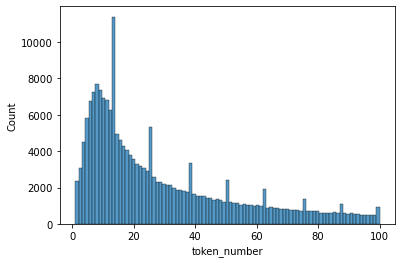

In [17]:
sns.histplot(df_L100['token_number'])

In [18]:
# get sample with Token < 100 to reduce the token number

df_M100 = df[(df['token_number'] > 100)]
df_M100.head()

,text,class,token_number
9,m losthello ve struggle year m afraid past yea...,suicide,196
11,honetly not know m feel like feel unbearably s...,suicide,112
32,trap inside voiddear care read doubt fall crit...,suicide,586
33,post s opening monologue day girlfriend day ga...,non-suicide,198
51,revenge suicidedoe thought cross mind isolate ...,suicide,104


In [20]:
# Method to take the first 100 tokens

def slice_string(x):
    arr = x.split(" ")
    return " ".join(arr[:100])

In [21]:
df_M100['text'] = df_M100['text'].apply(lambda x: slice_string(x))
df_M100.head()

C:\Users\nurha\AppData\Local\Temp\ipykernel_16292\193669871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_M100['text'] = df_M100['text'].apply(lambda x: slice_string(x))


,text,class,token_number
9,m losthello ve struggle year m afraid past yea...,suicide,196
11,honetly not know m feel like feel unbearably s...,suicide,112
32,trap inside voiddear care read doubt fall crit...,suicide,586
33,post s opening monologue day girlfriend day ga...,non-suicide,198
51,revenge suicidedoe thought cross mind isolate ...,suicide,104


In [22]:
df_M100['new_token_number'] = df_M100['text'].progress_apply(count_token)

  0%|          | 0/32794 [00:00<?, ?it/s]

C:\Users\nurha\AppData\Local\Temp\ipykernel_16292\3011657425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_M100['new_token_number'] = df_M100['text'].progress_apply(count_token)


<AxesSubplot:xlabel='new_token_number', ylabel='Count'>

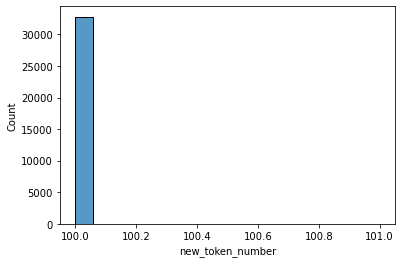

In [26]:
sns.histplot(df_M100['new_token_number'])

In [27]:
df_M100.head()

,text,class,token_number,new_token_number
9,m losthello ve struggle year m afraid past yea...,suicide,196,100
11,honetly not know m feel like feel unbearably s...,suicide,112,100
32,trap inside voiddear care read doubt fall crit...,suicide,586,100
33,post s opening monologue day girlfriend day ga...,non-suicide,198,100
51,revenge suicidedoe thought cross mind isolate ...,suicide,104,100


In [29]:
# concat both dataframe and export
new_df = pd.concat([df_L100, df_M100], ignore_index=True)
new_df.head()

,text,class,token_number,new_token_number
0,ex wife threaten suiciderecently leave wife go...,suicide,55,NaN
1,weird affect compliment s come know irl feel g...,non-suicide,11,NaN
2,finally hear bad year swear fucking s annoying,non-suicide,8,NaN
3,need helpjust help m cry hard,suicide,6,NaN
4,trigger warning excuse self inflicted burn kno...,suicide,90,NaN


In [30]:
new_df.to_csv('Cleaned_Suicide_Detection.csv', index=False)